In [1]:
from BacktestingEngine import Intraday_Simulator, StrategyPerformance
from statsmodels.stats.stattools import jarque_bera

import pandas_ta as ta
import datetime

In [2]:
class Algos:
    def __init__(self, num):
        """
        Inputs
        :num (string) algo no. you want to run
        """
        self.num = num
        self.__setup_func = getattr(self, f'setup{num}')
        self.__algo_func = getattr(self, f'algo{num}')

    def setup1(self, df):
        df["small_rolling"] = ta.sma(df["close"], 20)
        df["long_rolling"] = ta.sma(df["close"], 200)
        return df
    
    def algo1(self, **var):
        """
        Golden Crossover
        """
        df = var["df"]
        row = df.iloc[-1]

        if row.hasnans:
            return 0

        rol_small, rol_long = row["small_rolling"], row["long_rolling"]
        
        # Buy
        if not var["bought"] and rol_small > rol_long:
            return 1
        
        # Sell
        if var["bought"] and rol_small < rol_long:
            return -1
        
        return 0
    
    def send_setup(self, df):
        """
        Add columns/indicators to calculate before the run in order to save time

        Inputs
        :df (pd.DataFrame) The DataFrame containing OHLC (Open, High, Low, Close), Adj Close and Volume

        Output
        :df (pd.DataFrame) Same DataFrame with more columns and/or indicators
        """
        return self.__setup_func(df)
        # return self.setup11(df)

    def send_algo(self, **var):
        """
        Get values from the environment

        Inputs (var)
        :df (pd.DataFrame)            The DataFrame containing all values upto current granularity (i.e. 1m, 5m, 1d)
        :balance (float)              Cash spendable
        :shares (integer)             Position
        :initial_day_balance (float)  Money in the account at the beginning of the day
        :last_market_exposure (float) Money used to buy Shares at the last buy point
        :market_exposure (float)      Shares * Price
        :new_stock (bool)             True if it is the start of a file
        :bought (bool)                True if any shares have been bought

        Output
        :(float) a value between 0 and 1 indicating how many shares to buy from total account balance
        """
        return self.__algo_func(**var)
        # return self.algo11(df)

<h3>
<font color='blue'> 5 days </font> is a weeks worth of trading <br>
<font color='blue'> 21 days </font> is a months worth of trading <br>
<font color='blue'> 251 days </font> is a years worth of trading <br>
</h3>

In [3]:
Sim = Intraday_Simulator("Data/intraday_trading")
Sim.filter_files(cycle=True)

Sim.setup(account_balance=5000, trade_method="fixed", trade_cost=2, limit=-1, algorithm=Algos("1"))
Sim.run(warnings=False, verbose=False, progress=True, capture_trades=True, slippage=0)

88 / 88 Data/intraday_trading/RCII_2022-09-30.csvv


{'Final': 5807.26,
 'Net': 807.26,
 'Total Trades': 111,
 'Winning trades': 37.83783783783784}

Outliers found
(5406.08, 719.6, 'Data/intraday_trading/KNTE_2022-10-12.csv') at index 35
Before removing outliers


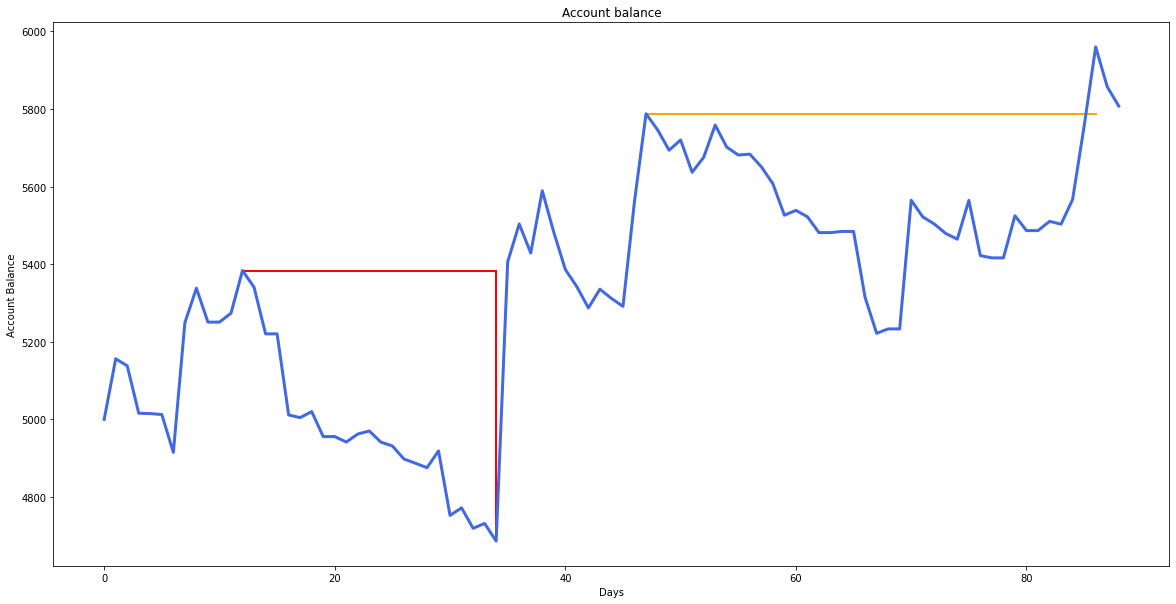

After removing outliers


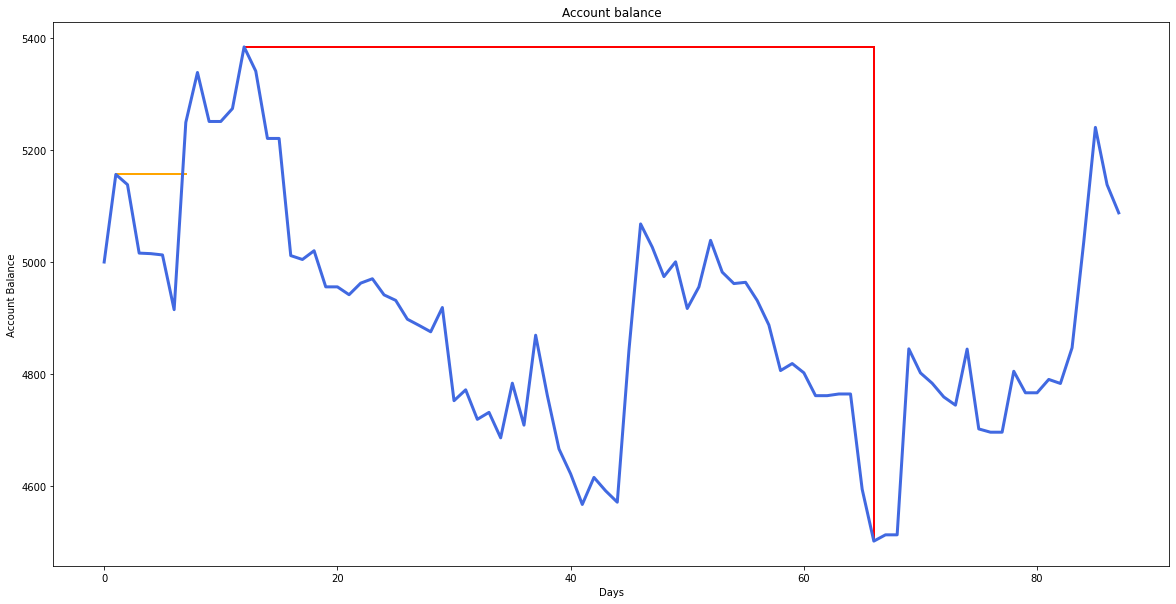

{'mean': 1.0, '%mean': 7.324288725372365e-06, 'median': -8.5, '%median': -0.0017461867862927452, 'std dev': 95.92215776562381, '%std dev': 0.01934443500965352, 'variance': 9201.060350413223, 'range': 542.87, 'min range': -208.93, 'max range': 333.94, 'skewness': 1.28699738638407, 'kurtosis': 2.877386418109267, 'sharpe ratio': 0.0031817235665096157, 'max drawdown': 16.368972434801996, 'max drawdown length': [(1, 7)], 'Ending balance': 5087.68}
{'mean': 9.07, '%mean': 0.0014146388977021216, 'median': -7.2, '%median': -0.001382749994005419, 'std dev': 121.79750873228994, '%std dev': 0.022540762448635746, 'variance': 14834.633133392244, 'range': 928.53, 'min range': -208.93, 'max range': 719.6, 'skewness': 2.7662432575601015, 'kurtosis': 12.790179869465133, 'sharpe ratio': 0.5273877428289514, 'max drawdown': 12.948794391846342, 'max drawdown length': [(47, 86)], 'Ending balance': 5807.26149177551}


In [4]:
Algotesting = StrategyPerformance(save_plots=True, folder_name="ALGO_1")
Algotesting.find_outliers(Sim)

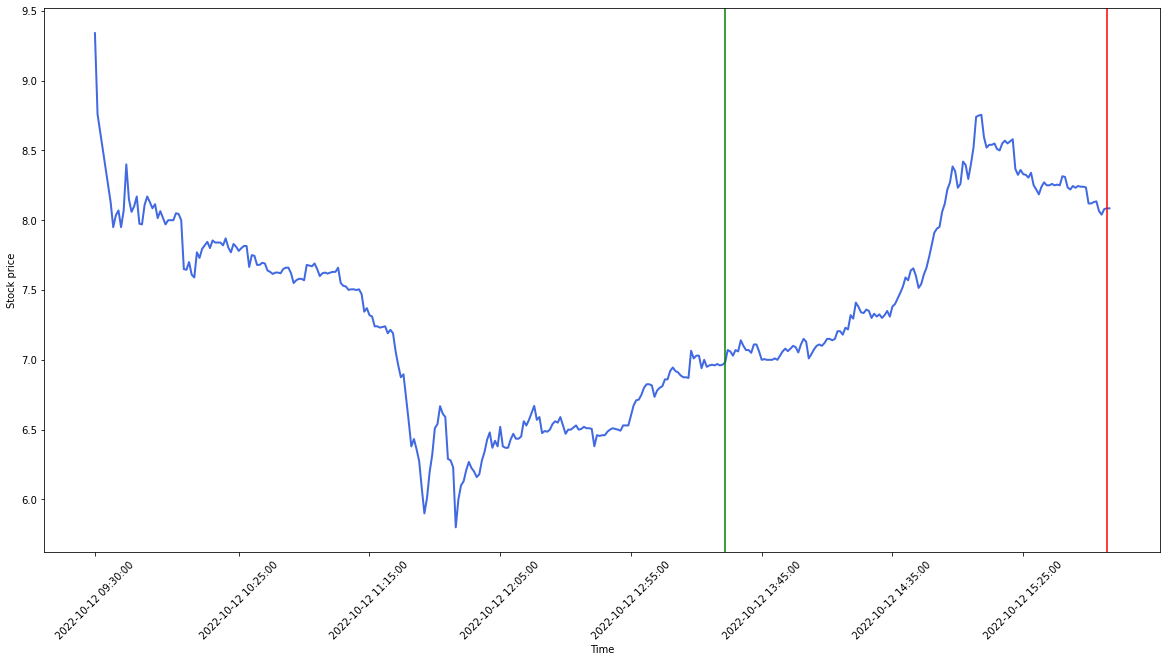

In [5]:
Algotesting.check_outliers(Sim, customs=[])

In [6]:
# Algotesting.remove_outliers(Sim)

In [7]:
print(f"Returns normality: {jarque_bera(Sim.get_history([1]))[1][0] < 0.05}")

Returns normality: True


23


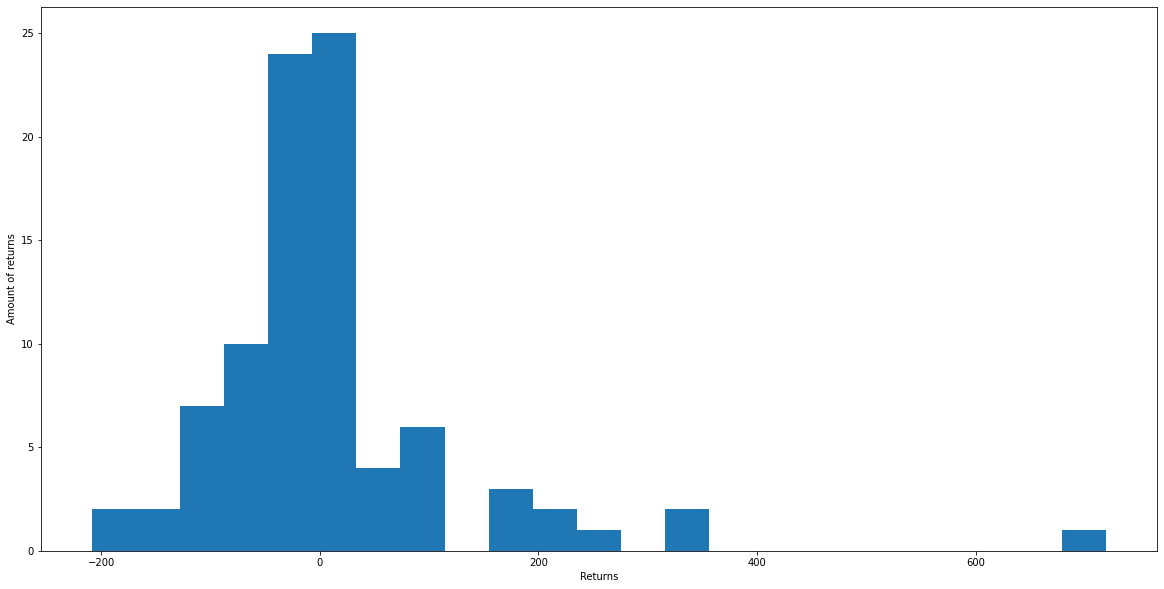

In [8]:
# 'range' or 'total length'
Algotesting.returns_histogram(Sim, bins_algo="total length", bins_num=None)

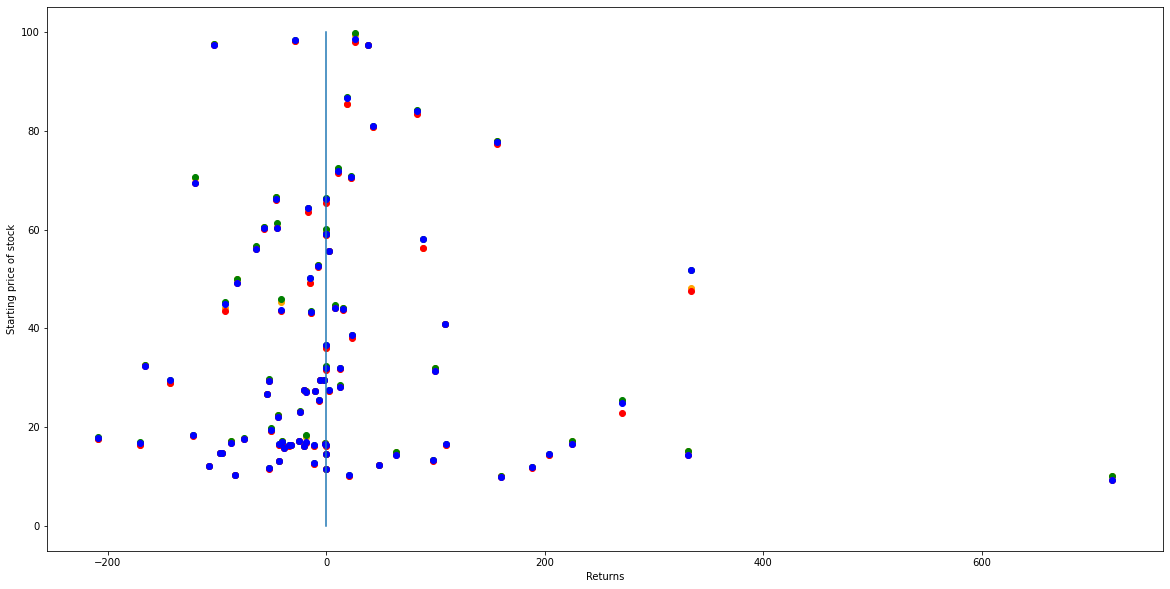

In [9]:
Algotesting.price_to_returns(Sim)

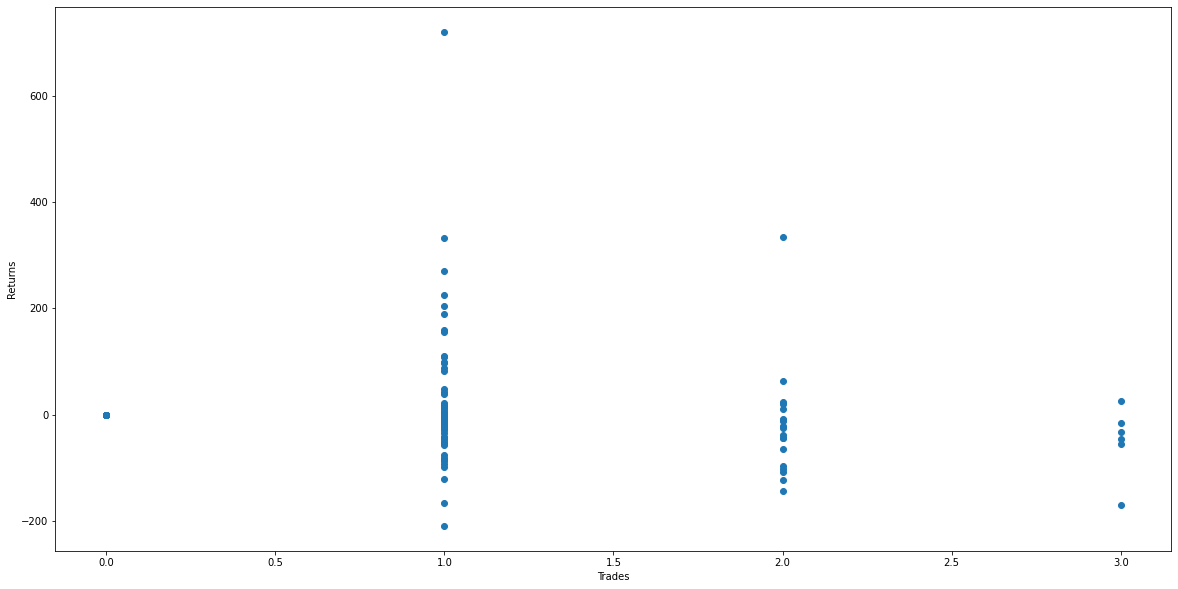

In [10]:
# If you remve outliers this will not work
Algotesting.returns_to_trades(Sim, returns_line=None)

# Run all Algorithms (Takes sometime)

In [ ]:
input("Press Enter to continue")
Sim = Intraday_Simulator("Data/intra_all_new_test")
Sim.filter_files(cycle=True)

results = []

for i in range(1, int((len(dir(Algos)) - 28) / 2) + 1):
    print(f"Running Algo {i}")
    Sim.setup(account_balance=5000, trade_method="fixed", trade_cost=2, limit=-1, Sim=Algos(str(i)))
    results.append((Sim.run(warnings=False, verbose=False, progress=False, capture_trades=False, slippage=0), str(i)))

In [ ]:
sorted(results, key=lambda x: x[0]["Net"], reverse=True)